# Objective 01 - use scikit-learn for random forests


In [241]:
# import the library and dataset
from sklearn.datasets import load_wine
import pandas as pd

# load the data and convert to a DataFrame
data = load_wine()

df_wine = pd.DataFrame(data.data, columns = data.feature_names)
df_wine['target'] = pd.Series(data.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [242]:
# Separate the features and target

X = df_wine.drop('target', axis = 1)
y= df_wine['target']

# import the train_test_split function
from sklearn.model_selection import train_test_split

# split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [243]:
#import random forest model

from sklearn.ensemble import RandomForestClassifier


#create a Guassian classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)
rf_classifier.fit(X_train, y_train)

#predict the outcomes for a classifier problem
y_pred = rf_classifier.predict(X_test)

# get the score of the model with actual data
print(f'Model Score {rf_classifier.score(X_test, y_test)}')



Model Score 0.9777777777777777


In [244]:
#use the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#instantiate the class
dt_classifier = DecisionTreeClassifier()

# train the model using the training set
dt_classifier.fit(X_train,y_train)

# fir the model score
print(f'Decision tree model score is {dt_classifier.score(X_test, y_test)}')


Decision tree model score is 0.9333333333333333


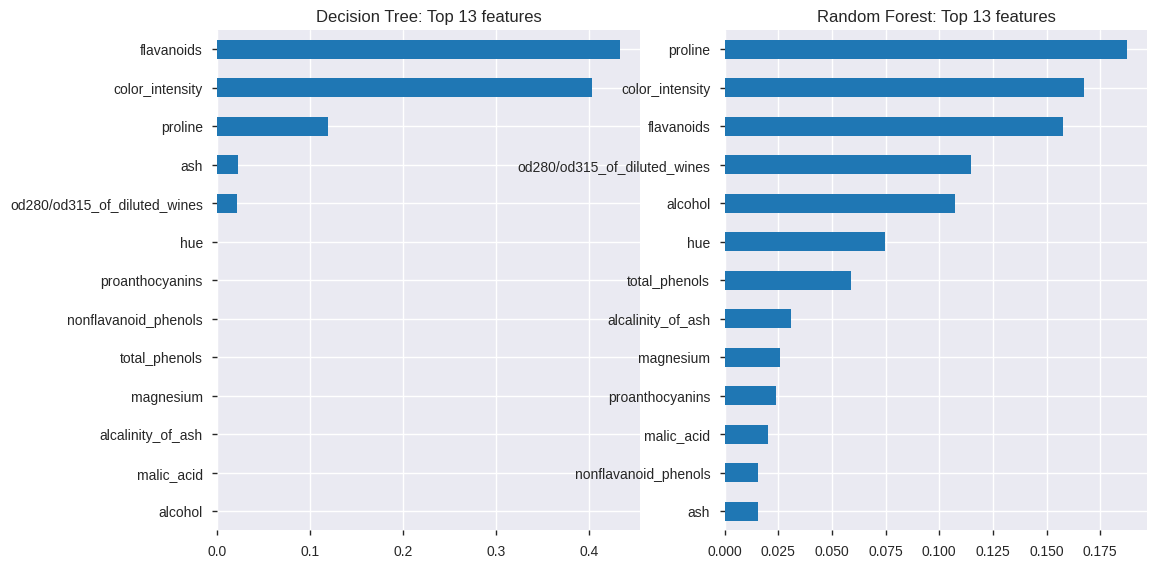

In [245]:
# PLot the feature importances
import matplotlib.pyplot as plt

rf_importances = pd.Series(rf_classifier.feature_importances_, X.columns)
dt_importances = pd.Series(dt_classifier.feature_importances_,X.columns)

# Plot the top n feature importances
n = 13
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (12, n/2))
ax1.set_title(f'Decision Tree: Top {n} features')
ax2.set_title(f'Random Forest: Top {n} features')

dt_importances.sort_values()[-n:].plot.barh(ax= ax1)
rf_importances.sort_values()[-n:].plot.barh(ax=ax2)



# Objective 02 - implement ordinal encoding with high-cardinality categoricals

In [246]:
# import 
import numpy as np

#create the dataframe

df = pd.DataFrame({
    'color':["a", "c", "a", "a", "b", "b", "d", "d", "c"], 
    'outcome':[1, 2, 0, 0, 1, 1, 3, 3, 2]
})

# set up X and y
X = df.drop('outcome', axis = 1)
y = df.drop('color', axis = 1)


In [247]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded = le.fit_transform(np.ravel(X))

print(f'The result of transforming X with LabelEncoder:\n {encoded}')
print(type(encoded))


The result of transforming X with LabelEncoder:
 [0 2 0 0 1 1 3 3 2]
<class 'numpy.ndarray'>


In [248]:
#Ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
ordinal_enc.fit_transform(X,y['outcome'])

array([[0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.]])

# Objective 03 - understand how categorical encodings affect trees differently compared to linear models

In [249]:
# url the data (Saved on GitHub)
url = 'https://tinyurl.com/y884c98f'

mushrooms = pd.read_csv(url)
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [250]:
# from pandas_profiling import ProfileReport # why is this code not working
# profile = ProfileReport(mushrooms, minimal = True).to_notebook_iframe()
# profile ???

In [251]:
# create the features matrix 
X = mushrooms.drop('class', axis =1)

# create and encode the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(mushrooms['class'])

In [252]:
# imports 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# use the deicision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# set up the OHE
categorical_features = X.columns
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder())])

# ser up our preprocessor/column transformer
preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer, categorical_features)])

# Add the classifier to the preprocessing pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

In [253]:
# apply the pipeline

# separate into the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Fit the model with oour deicision tree classifier
pipeline.fit(X_train, y_train)
print(f'Decision tree model score {pipeline.score(X_test, y_test)}')

Decision tree model score 1.0


In [254]:
# use the Logistics Regression classifier
from sklearn.linear_model import LogisticRegression

# add the classifier to the preprocessing pipeline
pipeline_logreg = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', LogisticRegression())])

# apply the pipeline
# separate the train and test again
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.25)

# fit the model with out Logistics Regression classifier
pipeline_logreg.fit(X_train, y_train)
print(f'Logistics Regression score {pipeline_logreg.score(X_test, y_test)}')

Logistics Regression score 1.0


In [255]:
# set up the ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
categorical_features = X.columns
categorical_transformer = Pipeline(steps = [('ordinal', OrdinalEncoder())])

# set up the preprocessor/column transformer
preprocessor_ord = ColumnTransformer(transformers= [('cat', categorical_transformer, categorical_features)])

# add the classifier to the preprocessing pipeline
pipeline_ord = Pipeline(steps = [('preprocessor_old', preprocessor_ord), ('classifier', DecisionTreeClassifier())])


In [256]:
# fit the model with out logistics regression classifier
pipeline_ord.fit(X_train, y_train)
print(f'Decision Tree model score ordinal ecoder {pipeline_ord.score(X_test, y_test)}')

Decision Tree model score ordinal ecoder 1.0


# Objective 04 - understand how tree ensembles reduce overfitting compared to a single decision tree with unlimited depth


In [257]:
import seaborn as sns

penguins = sns.load_dataset('penguins')

# remove the Nans and nulls
penguins.dropna(inplace=True)

penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [258]:
# create the features matrix
X = penguins.drop(['species', 'island', 'sex'], axis = 1)

# create the target array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(penguins['sex'])

# create the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [259]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [260]:
# fit the model with Logistics Regression classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f'Logistics Regression score is {logreg.score(X_test, y_test)}')

Logistics Regression score is 0.8571428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [261]:
# fit the model with a deicision tree classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f'Decision Tree Classifierscore is {tree.score(X_test, y_test)}')

Decision Tree Classifierscore is 0.8809523809523809


In [262]:
# fit the model with random forest classifier
trees_rand = RandomForestClassifier()
trees_rand.fit(X_train, y_train)
print(f'Decision Tree Classifierscore is {trees_rand.score(X_test, y_test)}')

Decision Tree Classifierscore is 0.8928571428571429


In [263]:
# Look at the accuraccy with different number of trees

tree = DecisionTreeClassifier(max_depth= 100)
tree.fit(X_train,y_train)
print(f'Decision Tree Classifier score on train is {tree.score(X_train, y_train)}')
print(f'Decision Tree Classifier score on test is {tree.score(X_test, y_test)}')

Decision Tree Classifier score on train is 1.0
Decision Tree Classifier score on test is 0.8928571428571429


In [264]:
# look at the training accuracy vs. test accuracy


# Decision tree
accuracy_train = []
accuracy_test = []

for i in range(1,160,5):
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train,y_train)
  accuracy_test.append(tree.score(X_test, y_test))
  accuracy_train.append(tree.score(X_train, y_train))


# Decision tree
rf_accuracy_train = []
rf_accuracy_test = []

for i in range(1,160,5):
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train,y_train)
  rf_accuracy_test.append(tree.score(X_test, y_test))
  rf_accuracy_train.append(tree.score(X_train, y_train))


Text(0.5, 1.0, 'Random Forest')

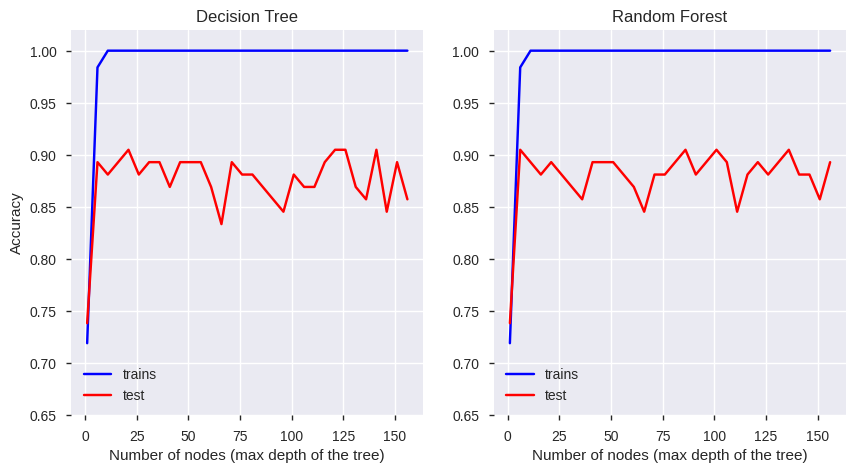

In [265]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

xvals = range(1,160,5)
ax2.plot(xvals, rf_accuracy_train, color='b', label='trains')
ax2.plot(xvals, rf_accuracy_test, color = 'red', label='test')
ax2.legend()

ax1.plot(xvals, accuracy_train, color='b', label='trains')
ax1.plot(xvals, accuracy_test, color = 'red', label='test')
ax1.legend()

ax1.set_ylim([0.65, 1.02])
ax2.set_ylim([0.65, 1.02])

ax1.set_xlabel('Number of nodes (max depth of the tree)')
ax2.set_xlabel('Number of nodes (max depth of the tree)')
ax1.set_ylabel('Accuracy')
ax1.set_title('Decision Tree')
ax2.set_title('Random Forest')
